In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, Normalizer

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

%matplotlib notebook

# Import csv file to dataframe df

In [48]:
df_raw = pd.read_csv("June2020.csv")
df = df_raw.copy()

# Calculate number of samples, m, and number of features, n

In [49]:
m,n = df.shape
print("Number of samples: ",m)
print("Number of features: ",n)

Number of samples:  8602
Number of features:  49


# Inspect df head

In [50]:
df.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,06/08/2010,within an hour,100%,t,3,3,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,Churchtown,Dn Laoghaire-Rathdown,t,Bungalow,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",NaN,$50.00,NaN,NaN,NaN,$10.00,1,$0.00,3.0,1125.0,78,227,25,20/03/2011,95.0,10.0,10.0,10.0,10.0,10.0,10.0,f,t,f,moderate,t,t,3,2.01
1,27/03/2011,NaN,NaN,f,1,1,"['email', 'phone', 'reviews']",t,f,Templeogue,South Dublin,t,House,Private room,2,NaN,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Free parking on p...",NaN,$30.00,$200.00,$700.00,NaN,NaN,1,$10.00,1.0,5.0,234,1,0,11/05/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,f,flexible,f,f,1,0.07
2,06/08/2010,within an hour,100%,t,3,3,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,Churchtown,Dn Laoghaire-Rathdown,t,Bungalow,Private room,2,1.5,1.0,1.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",NaN,$50.00,NaN,NaN,$0.00,$10.00,1,$0.00,3.0,14.0,182,182,34,24/05/2011,96.0,10.0,9.0,10.0,10.0,10.0,10.0,f,t,f,moderate,t,t,3,1.65
3,20/05/2011,within a day,100%,f,4,4,"['email', 'phone', 'reviews']",t,f,Sandymount,Dublin City,t,House,Private room,2,2.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free parking on pre...",NaN,$55.00,$286.00,NaN,NaN,NaN,1,$13.00,2.0,14.0,142,110,0,18/06/2011,94.0,9.0,9.0,10.0,9.0,9.0,9.0,f,f,f,strict_14_with_grace_period,f,f,3,1.00
4,01/07/2011,NaN,NaN,f,0,0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,Beaumont,Dublin City,t,House,Private room,1,2.0,3.0,6.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Free parking on ...",NaN,$29.00,$200.00,$790.00,$0.00,$16.00,1,$0.00,2.0,28.0,312,311,35,20/03/2012,95.0,10.0,9.0,10.0,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,t,3,3.09


In [51]:
drop_cols = ["first_review","neighbourhood", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin","review_scores_communication", "review_scores_location", "review_scores_value"]
df.drop(drop_cols, axis=1, inplace=True)

m,n = df.shape
print("Number of samples: ",m)
print("Number of features: ",n)

Number of samples:  8602
Number of features:  41


# Clean up price data
Remove dollar sign "\\$" from any price data \
Also remove commas eg. $1,000 >> 1000

In [35]:
column_name = "price"
new_column = df[column_name].astype(str)
new_column = [s.replace('$', '', 1) for s in new_column]
new_column = [s.replace(',', '', 1) for s in new_column]
new_column = np.array(new_column).astype(float)
df[column_name] = new_column

column_name = "weekly_price"
new_column = df[column_name].astype(str)
new_column = [s.replace('$', '', 1) for s in new_column]
new_column = [s.replace(',', '', 1) for s in new_column]
new_column = np.array(new_column).astype(float)
df[column_name] = new_column

column_name = "monthly_price"
new_column = df[column_name].astype(str)
new_column = [s.replace('$', '', 1) for s in new_column]
new_column = [s.replace(',', '', 1) for s in new_column]
new_column = np.array(new_column).astype(float)
df[column_name] = new_column

column_name = "security_deposit"
new_column = df[column_name].astype(str)
new_column = [s.replace('$', '', 1) for s in new_column]
new_column = [s.replace(',', '', 1) for s in new_column]
new_column = np.array(new_column).astype(float)
df[column_name] = new_column

column_name = "cleaning_fee"
new_column = df[column_name].astype(str)
new_column = [s.replace('$', '', 1) for s in new_column]
new_column = [s.replace(',', '', 1) for s in new_column]
new_column = np.array(new_column).astype(float)
df[column_name] = new_column

column_name = "extra_people"
new_column = df[column_name].astype(str)
new_column = [s.replace('$', '', 1) for s in new_column]
new_column = [s.replace(',', '', 1) for s in new_column]
new_column = np.array(new_column).astype(float)
df[column_name] = new_column

# clean up host_response_rate
Remove percent symbol, '%' from rate column and express as a decimal \
eg. 87% >> 0.87

In [36]:
column_name = "host_response_rate"
new_column = df[column_name].astype(str)
new_column = [s.replace('%', '', 1) for s in new_column]
new_column = np.array(new_column).astype(float)
new_column = [s/100.0 for s in new_column]
df[column_name] = new_column

# Inspect df

In [37]:
df.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,06/08/2010,within an hour,1.0,t,3,3,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,Dn Laoghaire-Rathdown,t,Bungalow,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",NaN,50.0,NaN,NaN,NaN,10.0,1,0.0,3.0,1125.0,78,227,25,95.0,f,t,f,moderate,t,t,3,2.01
1,27/03/2011,NaN,NaN,f,1,1,"['email', 'phone', 'reviews']",t,f,South Dublin,t,House,Private room,2,NaN,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Free parking on p...",NaN,30.0,200.0,700.0,NaN,NaN,1,10.0,1.0,5.0,234,1,0,NaN,f,f,f,flexible,f,f,1,0.07
2,06/08/2010,within an hour,1.0,t,3,3,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,Dn Laoghaire-Rathdown,t,Bungalow,Private room,2,1.5,1.0,1.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",NaN,50.0,NaN,NaN,0.0,10.0,1,0.0,3.0,14.0,182,182,34,96.0,f,t,f,moderate,t,t,3,1.65
3,20/05/2011,within a day,1.0,f,4,4,"['email', 'phone', 'reviews']",t,f,Dublin City,t,House,Private room,2,2.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free parking on pre...",NaN,55.0,286.0,NaN,NaN,NaN,1,13.0,2.0,14.0,142,110,0,94.0,f,f,f,strict_14_with_grace_period,f,f,3,1.00
4,01/07/2011,NaN,NaN,f,0,0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,Dublin City,t,House,Private room,1,2.0,3.0,6.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Free parking on ...",NaN,29.0,200.0,790.0,0.0,16.0,1,0.0,2.0,28.0,312,311,35,95.0,f,f,f,strict_14_with_grace_period,f,t,3,3.09


# Create 'n_verifications' and 'n_amenities' features
Instead of analyzing the specific verification types used and the types of amenities available we instead use simplified features that express the total number of verifications or amenities available. \

eg. amenities = ["Internet","TV","Parking"] >>> n_amenities = 3

#### Then drop "host_verifications" and "amenities"

In [38]:
n_verifications = []
n_amenities = []

for i in df.index.tolist():
    # Count the number of columns used to separate the individual components and add 1.
    n_verifications.append(df.loc[i]["host_verifications"].count(',')+1)
    n_amenities.append(df.loc[i]["amenities"].count(',')+1)
    
df["n_verifications"] = n_verifications
df["n_amenities"] = n_amenities


# Inspect df

In [39]:
df.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,n_verifications,n_amenities
0,06/08/2010,within an hour,1.0,t,3,3,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,Dn Laoghaire-Rathdown,t,Bungalow,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",NaN,50.0,NaN,NaN,NaN,10.0,1,0.0,3.0,1125.0,78,227,25,95.0,f,t,f,moderate,t,t,3,2.01,9,38
1,27/03/2011,NaN,NaN,f,1,1,"['email', 'phone', 'reviews']",t,f,South Dublin,t,House,Private room,2,NaN,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Free parking on p...",NaN,30.0,200.0,700.0,NaN,NaN,1,10.0,1.0,5.0,234,1,0,NaN,f,f,f,flexible,f,f,1,0.07,3,15
2,06/08/2010,within an hour,1.0,t,3,3,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,Dn Laoghaire-Rathdown,t,Bungalow,Private room,2,1.5,1.0,1.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",NaN,50.0,NaN,NaN,0.0,10.0,1,0.0,3.0,14.0,182,182,34,96.0,f,t,f,moderate,t,t,3,1.65,9,39
3,20/05/2011,within a day,1.0,f,4,4,"['email', 'phone', 'reviews']",t,f,Dublin City,t,House,Private room,2,2.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free parking on pre...",NaN,55.0,286.0,NaN,NaN,NaN,1,13.0,2.0,14.0,142,110,0,94.0,f,f,f,strict_14_with_grace_period,f,f,3,1.00,3,15
4,01/07/2011,NaN,NaN,f,0,0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,Dublin City,t,House,Private room,1,2.0,3.0,6.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Free parking on ...",NaN,29.0,200.0,790.0,0.0,16.0,1,0.0,2.0,28.0,312,311,35,95.0,f,f,f,strict_14_with_grace_period,f,t,3,3.09,7,34


# Recode any True/False features as 1/0

In [40]:
tf_cols = ["host_is_superhost", "host_has_profile_pic", "host_identity_verified", "is_location_exact", "requires_license", "instant_bookable", "is_business_travel_ready", "require_guest_profile_picture", "require_guest_phone_verification"]

for col in tf_cols:
    df.loc[:][col][df[col]=="t"] = 1
    df.loc[:][col][df[col]=="f"] = 0

# Inspect the number of NaN values present per feature

<IPython.core.display.Javascript object>


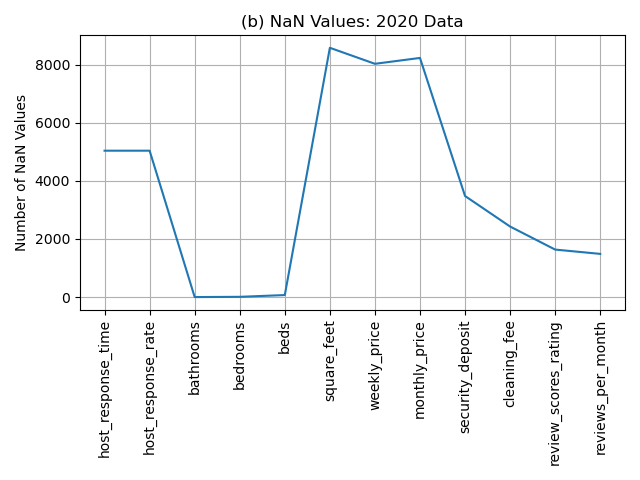

In [41]:
n_nan = []
nan_cols = []
n_cols = len(df.columns.tolist())

for col in df.columns.tolist():
    if df[col].isna().sum() > 0:
        nan_cols.append(col)
        n_nan.append(df[col].isna().sum())
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(n_nan)
ax.set_ylabel("Number of NaN Values")
ax.set_title("(b) NaN Values: 2020 Data")
ax.set_xticks(list(range(0,len(n_nan))))
ax.set_xticklabels(nan_cols, rotation=90)
ax.grid("on")
plt.tight_layout()

Square feet is almost entirely NaN values: drop \
Weekly price and monthly price almost entirely NaN values : drop weekly_price and monthly_price  
Security deposit has a lot of NaN but can assume NaN means no deposit cost : set security_deposit NaN to 0  
Cleaning_fee has a lot of NaN but can assume NaN means no deposit cost : set cleaning_fee NaN to 0  
  
#### Review_scores_rating is the dependent variable in this analysis
Not sure of the nature of why they are NaN.  Have they never been reviewed?? Never had a customer?  Is a zero suitable??  
Might be safest to drop those NaN samples.  Still ~ 7000 samples remaining

## Drop square_feet, weekly_price and monthly_price features, and drop all review_scores_rating NaN samples >>>then inspect again

In [42]:
drop_cols = ["square_feet", "weekly_price", "monthly_price", "host_response_time", "host_response_rate"]
df.drop(drop_cols, axis=1, inplace = True) 

df['security_deposit'] = df['security_deposit'].fillna(0)
df['security_deposit']

df['cleaning_fee'] = df['cleaning_fee'].fillna(0)
df['cleaning_fee']

nan_index = df[df["review_scores_rating"].isna()].index
nan_index
df.drop(nan_index, inplace = True) 

# Inspect the number of NaN values present per feature

Number of samples:  6967
Number of features:  38


<IPython.core.display.Javascript object>


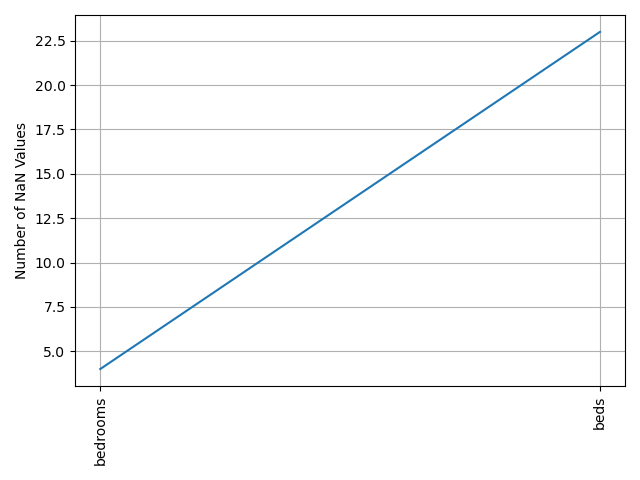

In [43]:
m,n = df.shape
print("Number of samples: ",m)
print("Number of features: ",n)

n_nan = []
nan_cols = []
n_cols = len(df.columns.tolist())

for col in df.columns.tolist():
    if df[col].isna().sum() > 0:
        nan_cols.append(col)
        n_nan.append(df[col].isna().sum())
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(n_nan)
ax.set_ylabel("Number of NaN Values")
ax.set_xticks(list(range(0,len(n_nan))))
ax.set_xticklabels(nan_cols, rotation=90)
ax.grid("on")
plt.tight_layout()

In [44]:
n_wnan = df.shape[0]
print("Number of samples before drop na:", n_wnan)

df.dropna(inplace=True)
n_wonan = df.shape[0]
print("Number of samples before drop na:", n_wonan)

m,n = df.shape
print("Number of samples: ",m)
print("Number of features: ",n)

Number of samples before drop na: 6967
Number of samples before drop na: 6942
Number of samples:  6942
Number of features:  38


In [45]:
n_wnan - n_wonan

25

In [17]:
df["host_since"] = pd.to_datetime(df["host_since"],infer_datetime_format=True)

ix_date_sorted = df.index

df["host_since_recode"] = np.zeros(m)
df.loc[ix_date_sorted[0], "host_since_recode"] = 0

#df.head()

from datetime import datetime

prev_ix = ix_date_sorted[0]

for ix in ix_date_sorted[1::]:
    a = df.loc[prev_ix, "host_since"]
    b = df.loc[ix, "host_since"]
    
    delta = b - a
    
    df.loc[ix, "host_since_recode"] = df.loc[prev_ix, "host_since_recode"] + delta.days
    
    prev_ix = ix
    
    #print(delta.days)
    
df.head()    

,host_since,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,n_verifications,n_amenities,host_since_recode
0,2010-06-08,1,3,3,"['email', 'phone', 'facebook', 'reviews', 'jum...",1,0,Dn Laoghaire-Rathdown,1,Bungalow,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",50.0,0.0,10.0,1,0.0,3.0,1125.0,78,227,25,95.0,0,1,0,moderate,1,1,3,2.01,9,38,0.0
2,2010-06-08,1,3,3,"['email', 'phone', 'facebook', 'reviews', 'jum...",1,0,Dn Laoghaire-Rathdown,1,Bungalow,Private room,2,1.5,1.0,1.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",50.0,0.0,10.0,1,0.0,3.0,14.0,182,182,34,96.0,0,1,0,moderate,1,1,3,1.65,9,39,0.0
3,2011-05-20,0,4,4,"['email', 'phone', 'reviews']",1,0,Dublin City,1,House,Private room,2,2.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free parking on pre...",55.0,0.0,0.0,1,13.0,2.0,14.0,142,110,0,94.0,0,0,0,strict_14_with_grace_period,0,0,3,1.00,3,15,346.0
4,2011-01-07,0,0,0,"['email', 'phone', 'reviews', 'offline_governm...",1,0,Dublin City,1,House,Private room,1,2.0,3.0,6.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Free parking on ...",29.0,0.0,16.0,1,0.0,2.0,28.0,312,311,35,95.0,0,0,0,strict_14_with_grace_period,0,1,3,3.09,7,34,213.0
5,2011-04-07,1,2,2,"['email', 'phone', 'reviews', 'jumio', 'offlin...",1,1,Dn Laoghaire-Rathdown,0,Townhouse,Private room,6,1.5,2.0,4.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",55.0,0.0,0.0,2,30.0,1.0,12.0,347,289,44,97.0,0,0,0,moderate,0,0,2,4.69,6,36,303.0


In [18]:
df.drop("host_since", axis=1, inplace=True)
df.head()

,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,n_verifications,n_amenities,host_since_recode
0,1,3,3,"['email', 'phone', 'facebook', 'reviews', 'jum...",1,0,Dn Laoghaire-Rathdown,1,Bungalow,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",50.0,0.0,10.0,1,0.0,3.0,1125.0,78,227,25,95.0,0,1,0,moderate,1,1,3,2.01,9,38,0.0
2,1,3,3,"['email', 'phone', 'facebook', 'reviews', 'jum...",1,0,Dn Laoghaire-Rathdown,1,Bungalow,Private room,2,1.5,1.0,1.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",50.0,0.0,10.0,1,0.0,3.0,14.0,182,182,34,96.0,0,1,0,moderate,1,1,3,1.65,9,39,0.0
3,0,4,4,"['email', 'phone', 'reviews']",1,0,Dublin City,1,House,Private room,2,2.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free parking on pre...",55.0,0.0,0.0,1,13.0,2.0,14.0,142,110,0,94.0,0,0,0,strict_14_with_grace_period,0,0,3,1.00,3,15,346.0
4,0,0,0,"['email', 'phone', 'reviews', 'offline_governm...",1,0,Dublin City,1,House,Private room,1,2.0,3.0,6.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Free parking on ...",29.0,0.0,16.0,1,0.0,2.0,28.0,312,311,35,95.0,0,0,0,strict_14_with_grace_period,0,1,3,3.09,7,34,213.0
5,1,2,2,"['email', 'phone', 'reviews', 'jumio', 'offlin...",1,1,Dn Laoghaire-Rathdown,0,Townhouse,Private room,6,1.5,2.0,4.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",55.0,0.0,0.0,2,30.0,1.0,12.0,347,289,44,97.0,0,0,0,moderate,0,0,2,4.69,6,36,303.0


In [19]:
display(df['amenities'])

column_name = "amenities"
new_column = df[column_name].astype(str)
new_column = [s.replace('{', '') for s in new_column]
new_column = [s.replace('}', '') for s in new_column]
new_column = [s.replace('"', '') for s in new_column]
df[column_name] = new_column

display(df['amenities'])

0       {Internet,Wifi,Kitchen,"Free parking on premis...
2       {Internet,Wifi,Kitchen,"Free parking on premis...
3       {TV,Internet,Wifi,Kitchen,"Free parking on pre...
4       {TV,"Cable TV",Internet,Wifi,"Free parking on ...
5       {Internet,Wifi,Kitchen,"Free parking on premis...
                              ...                        
8527    {Wifi,Kitchen,Breakfast,Heating,Washer,"Smoke ...
8530    {Wifi,Kitchen,"Pets allowed",Heating,Washer,Dr...
8532    {TV,Wifi,Kitchen,"Free parking on premises",He...
8533    {Kitchen,"Free parking on premises","Indoor fi...
8540    {TV,Wifi,Kitchen,"Free parking on premises",He...
Name: amenities, Length: 6942, dtype: object

0       Internet,Wifi,Kitchen,Free parking on premises...
2       Internet,Wifi,Kitchen,Free parking on premises...
3       TV,Internet,Wifi,Kitchen,Free parking on premi...
4       TV,Cable TV,Internet,Wifi,Free parking on prem...
5       Internet,Wifi,Kitchen,Free parking on premises...
                              ...                        
8527    Wifi,Kitchen,Breakfast,Heating,Washer,Smoke al...
8530    Wifi,Kitchen,Pets allowed,Heating,Washer,Dryer...
8532    TV,Wifi,Kitchen,Free parking on premises,Heati...
8533    Kitchen,Free parking on premises,Indoor firepl...
8540    TV,Wifi,Kitchen,Free parking on premises,Heati...
Name: amenities, Length: 6942, dtype: object

In [20]:
column_name = "host_verifications"
display(df[column_name])
new_column = df[column_name].astype(str)
new_column = [s.replace('{', '') for s in new_column]
new_column = [s.replace('}', '') for s in new_column]
new_column = [s.replace('[', '') for s in new_column]
new_column = [s.replace(']', '') for s in new_column]
new_column = [s.replace('"', '') for s in new_column]
new_column = [s.replace("'", '') for s in new_column]
df[column_name] = new_column

display(df[column_name])

0       ['email', 'phone', 'facebook', 'reviews', 'jum...
2       ['email', 'phone', 'facebook', 'reviews', 'jum...
3                           ['email', 'phone', 'reviews']
4       ['email', 'phone', 'reviews', 'offline_governm...
5       ['email', 'phone', 'reviews', 'jumio', 'offlin...
                              ...                        
8527    ['phone', 'offline_government_id', 'selfie', '...
8530                                   ['email', 'phone']
8532    ['email', 'phone', 'facebook', 'reviews', 'jum...
8533    ['email', 'phone', 'offline_government_id', 's...
8540    ['email', 'phone', 'facebook', 'jumio', 'gover...
Name: host_verifications, Length: 6942, dtype: object

0       email, phone, facebook, reviews, jumio, offlin...
2       email, phone, facebook, reviews, jumio, offlin...
3                                   email, phone, reviews
4       email, phone, reviews, offline_government_id, ...
5       email, phone, reviews, jumio, offline_governme...
                              ...                        
8527    phone, offline_government_id, selfie, governme...
8530                                         email, phone
8532    email, phone, facebook, reviews, jumio, offlin...
8533    email, phone, offline_government_id, selfie, g...
8540         email, phone, facebook, jumio, government_id
Name: host_verifications, Length: 6942, dtype: object

In [21]:
# Creating dummy variables:
amenities_dummies = df['amenities'].str.get_dummies(sep=',')
amenities_dummies = amenities_dummies.add_prefix("amenities_")
host_verifications_dummies = df['host_verifications'].str.get_dummies(sep=',')
host_verifications_dummies = host_verifications_dummies.add_prefix("hostverifs_")
df = pd.concat([df, amenities_dummies, host_verifications_dummies], axis=1)

get_dummy_cols = ['neighbourhood_cleansed', 
                  'property_type', 'room_type', 'bed_type', 'cancellation_policy']

df = pd.get_dummies(df, columns=get_dummy_cols)
df_cols = df.columns.tolist()
df.head()

,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,n_verifications,n_amenities,host_since_recode,amenities_ toilet,amenities_24-hour check-in,amenities_Accessible-height bed,amenities_Accessible-height toilet,amenities_Air conditioning,amenities_Amazon Echo,amenities_BBQ grill,amenities_Baby bath,amenities_Baby monitor,amenities_Babysitter recommendations,amenities_Baking sheet,amenities_Balcony,amenities_Barbecue utensils,amenities_Bath towel,amenities_Bathroom essentials,amenities_Bathtub,amenities_Beach essentials,amenities_Beachfront,amenities_Bed linens,amenities_Bedroom comforts,amenities_Bidet,amenities_Board games,amenities_Body soap,amenities_Bread maker,amenities_Breakfast,amenities_Breakfast table,amenities_Building staff,amenities_Buzzer/wireless intercom,amenities_Cable TV,amenities_Carbon monoxide alarm,amenities_Cat(s),amenities_Changing table,amenities_Childrenâ€™s books and toys,amenities_Childrenâ€™s dinnerware,amenities_Cleaning before checkout,amenities_Coffee maker,amenities_Convection oven,amenities_Cooking basics,amenities_Crib,amenities_DVD player,amenities_Day bed,amenities_Disabled parking spot,amenities_Dishes and silverware,amenities_Dishwasher,amenities_Dog(s),amenities_Doorman,amenities_Double oven,amenities_Dryer,amenities_EV charger,amenities_Electric profiling bed,amenities_Elevator,amenities_En suite bathroom,amenities_Espresso machine,amenities_Essentials,amenities_Ethernet connection,amenities_Exercise equipment,amenities_Extra pillows and blankets,amenities_Extra space around bed,amenities_Family/kid friendly,amenities_Fire extinguisher,amenities_Fireplace guards,amenities_Firm mattress,amenities_First aid kit,amenities_Fixed grab bars for shower,amenities_Flat path to guest entrance,amenities_Formal dining area,amenities_Free parking on premises,amenities_Free street parking,amenities_Full kitchen,amenities_Game console,amenities_Garden or backyard,amenities_Gas oven,amenities_Ground floor access,amenities_Gym,amenities_HBO GO,amenities_Hair dryer,amenities_Handheld shower head,amenities_Hangers,amenities_Heated floors,amenities_Heated towel rack,amenities_Heating,amenities_High chair,amenities_Host greets you,amenities_Hot tub,amenities_Hot water,amenities_Hot water kettle,amenities_Indoor fireplace,amenities_Internet,amenities_Iron,amenities_Keypad,amenities_Kitchen,amenities_Kitchenette,amenities_Lake access,amenities_Laptop-friendly workspace,amenities_Lock on bedroom door,amenities_Lockbox,amenities_Long term stays allowed,amenities_Luggage dropoff allowed,amenities_Memory foam mattress,amenities_Microwave,amenities_Mini fridge,amenities_Netflix,amenities_No stairs or steps to enter,amenities_Other,amenities_Other pet(s),amenities_Outdoor parking,amenities_Outdoor seating,amenities_Outlet covers,amenities_Oven,amenities_Pack â€™n Play/travel crib,amenities_Paid parking off premises,amenities_Paid parking on premises,amenities_Patio or balcony,amenities_Pets allowed,amenities_Pets live on this property,amenities_Pillow-top mattress,amenities_Pocket wifi,amenities_Pool,amenities_Private bathroom,amenities_Private entrance,amenities_Private living room,amenities_Rain shower,amenities_Refrigerator,amenities_Roll-in shower,amenities_Room-darkening shades,amenities_Safety card,amenities_Self check-in,amenities_Shampoo,amenities_Shared gym,amenities_Shower gel,amenities_Single level home,amenities_Ski-in/Ski-out,amenities_Smart TV,amenities_Smart lock,amenities_Smoke alarm,amenities_Smoking allowed,

In [22]:
drop_cols = ["amenities", "host_verifications"]

df.drop(drop_cols, axis=1,inplace=True)

In [23]:
df.head()

,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,n_verifications,n_amenities,host_since_recode,amenities_ toilet,amenities_24-hour check-in,amenities_Accessible-height bed,amenities_Accessible-height toilet,amenities_Air conditioning,amenities_Amazon Echo,amenities_BBQ grill,amenities_Baby bath,amenities_Baby monitor,amenities_Babysitter recommendations,amenities_Baking sheet,amenities_Balcony,amenities_Barbecue utensils,amenities_Bath towel,amenities_Bathroom essentials,amenities_Bathtub,amenities_Beach essentials,amenities_Beachfront,amenities_Bed linens,amenities_Bedroom comforts,amenities_Bidet,amenities_Board games,amenities_Body soap,amenities_Bread maker,amenities_Breakfast,amenities_Breakfast table,amenities_Building staff,amenities_Buzzer/wireless intercom,amenities_Cable TV,amenities_Carbon monoxide alarm,amenities_Cat(s),amenities_Changing table,amenities_Childrenâ€™s books and toys,amenities_Childrenâ€™s dinnerware,amenities_Cleaning before checkout,amenities_Coffee maker,amenities_Convection oven,amenities_Cooking basics,amenities_Crib,amenities_DVD player,amenities_Day bed,amenities_Disabled parking spot,amenities_Dishes and silverware,amenities_Dishwasher,amenities_Dog(s),amenities_Doorman,amenities_Double oven,amenities_Dryer,amenities_EV charger,amenities_Electric profiling bed,amenities_Elevator,amenities_En suite bathroom,amenities_Espresso machine,amenities_Essentials,amenities_Ethernet connection,amenities_Exercise equipment,amenities_Extra pillows and blankets,amenities_Extra space around bed,amenities_Family/kid friendly,amenities_Fire extinguisher,amenities_Fireplace guards,amenities_Firm mattress,amenities_First aid kit,amenities_Fixed grab bars for shower,amenities_Flat path to guest entrance,amenities_Formal dining area,amenities_Free parking on premises,amenities_Free street parking,amenities_Full kitchen,amenities_Game console,amenities_Garden or backyard,amenities_Gas oven,amenities_Ground floor access,amenities_Gym,amenities_HBO GO,amenities_Hair dryer,amenities_Handheld shower head,amenities_Hangers,amenities_Heated floors,amenities_Heated towel rack,amenities_Heating,amenities_High chair,amenities_Host greets you,amenities_Hot tub,amenities_Hot water,amenities_Hot water kettle,amenities_Indoor fireplace,amenities_Internet,amenities_Iron,amenities_Keypad,amenities_Kitchen,amenities_Kitchenette,amenities_Lake access,amenities_Laptop-friendly workspace,amenities_Lock on bedroom door,amenities_Lockbox,amenities_Long term stays allowed,amenities_Luggage dropoff allowed,amenities_Memory foam mattress,amenities_Microwave,amenities_Mini fridge,amenities_Netflix,amenities_No stairs or steps to enter,amenities_Other,amenities_Other pet(s),amenities_Outdoor parking,amenities_Outdoor seating,amenities_Outlet covers,amenities_Oven,amenities_Pack â€™n Play/travel crib,amenities_Paid parking off premises,amenities_Paid parking on premises,amenities_Patio or balcony,amenities_Pets allowed,amenities_Pets live on this property,amenities_Pillow-top mattress,amenities_Pocket wifi,amenities_Pool,amenities_Private bathroom,amenities_Private entrance,amenities_Private living room,amenities_Rain shower,amenities_Refrigerator,amenities_Roll-in shower,amenities_Room-darkening shades,amenities_Safety card,amenities_Self check-in,amenities_Shampoo,amenities_Shared gym,amenities_Shower gel,amenities_Single level home,amenities_Ski-in/Ski-out,amenities_Smart TV,amenities_Smart lock,amenities_Smoke alarm,amenities_Smoking allowed,amenities_Soaking tub,ameniti

In [24]:
m,n = df.shape
print("Number of samples: ",m)
print("Number of features: ",n)

Number of samples:  6942
Number of features:  256


In [25]:
#df.to_csv("June20_cleaned.csv", sep=',')